# PID digital controller: Python implementation

The aim of this tutorial is to implement temperature control on the TCLab board. The successive stages will be:
- definition of the continuous PID corrector from the transfer function identified previously.
- determining the maximum sampling time required to maintain a sufficient phase margin.
- digitalisation of the corrector in the form of a recurrence equation.
- analysis of real performances.

## Requirements

> **Exercice:** Complete the requirements for the temperature control in the following table.

| Requirement | Assessment Criteria  | Level |  
| :-: | :-: | :-: |  
Control the temperature at 35°C  | Temperature reference tracking | ? 
 | Settling time at 5 % | ?    
 | Overshoot | ?   
 | Disturbance rejection | ?   

## Continuous controller 

### System transfer functions

In previous work, we identified the transfer function linking the heating control (input) $Q_1$ to the temperature (output) $T_1$ as second order:

$G_1(p) = \frac{\Delta T_1(p)}{Q_1(p)}=  \frac{0.65}{(27p + 1)(160p + 1)} $

with $\Delta T_1$ expressing the relative difference between the sensor temperature and the ambient temperature (around 20°C).

> **Question:** Approximate the transfer function $G_1(p)$ as a 1st order with pure delay.

$ G_1(s) = \frac{\Delta T_1(s)}{Q_1(s)}= \frac{0.65e^{-27s}}{160s + 1} $


### Zielgler-Nichols method

The Ziegler-Nichols approach to setting PID controllers can be used as an initial parameterisation. This approach is based on a transfer function of the form: 
$ G(s) = \frac{Ke^{-Ls}}{\tau s + 1} $ with $R=K/\tau$ 
with
- $K$ : the steady-state gain;
- $\tau$ : the dominant time-constant;
- $L$ : the pure time-delay.  

The form (P, PI, PD or PID) of the PID controller can then be chosen according to the value of $\tau$ compared
to $L$ by using following table: 

| $\frac{Time Constant}{Delay}=\frac{\tau}{L}$ | Best controller |
| :-:  | :-:  |
 $\frac{\tau}{L} > 20 $ | On-Off controller 
 $10 < \frac{\tau}{L} < 20 $ | P controller 
 $5 < \frac{\tau}{L} < 10 $ | PI controller 
 $2 < \frac{\tau}{L} < 5 $ | PID controller 
 
Then the following table defines the parameters of a P, PI or PID controller:
$G_c(s)=k_p(1+\frac{1}{\tau_i s}+\tau_d s)=k_p+\frac{k_i}{s}+k_s s$

| Type|$k_p$|$k_i$|$k_d$ |  
| :-: | :-: | :-: | :-: |  
 P | $\frac{1}{RL}$ | |   
 PI | $\frac{0.9}{RL}$ |$\frac{3}{10RL^2}$ |    
 PID | $\frac{1.2}{RL}$ |$\frac{0.6}{RL^2}$ | $\frac{0.6}{R}$   


> **Exercice:**  Select and calculate the corrector. 

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Ziegler Nichols input parameter
tau = 160 # [s] time constant of the 1st order
L= 27 # [s] delay
K = 0.65 # [°/%] static gain

R=K/tau

# Controller type 
# ??

In [5]:
# controller coefficient with Ziegler Nichols approach

# ??


#print("PID coefficient (parrallel form): ")
#print("Kp = %.3f"%Kp)
#print("Ki = %.3f"%Ki)
#print("Kd = %.3f"%Kd)

### Temporal performances

> **Exercice:** Analyse the performance by simulation in terms of time: the following code should plot the time response $T_1$ to a 1° step order. It is also interesting to plot the power demand $Q_1$. You can use `tf`, `step` from `control.matlab` package.   

In [6]:
import control.matlab as control

# system transfer function, based on second order model
G1 = 0.65*control.tf([1],[27,1])*control.tf([1],[160,1])

# controller and global model transfer functions

# ??

# Step response of the closed loop
t = np.linspace(0,400,1000)

# ??

#plt.plot(t,y, 'b', t,np.ones(1000),'g-')
#plt.xlabel('Time (s)')
#plt.ylabel('Output (t°C)')
#plt.show()

#plt.plot(t,Q, 'r')
#plt.xlabel('Time (s)')
#plt.ylabel('Power (%) input')
#plt.grid()
#plt.show()

### Frequency performances

By plotting the Bode and Nichols diagrams in open or closed loops, we can establish the stability margins and the bandwidth.

> **Exercice:** Analyse the frequency performances with Bode plots in open loop and closed loop. Adjust PID gains if necessary. Nichols diagram can be also usefull. You can use `bode` (with `margins=True` parameter), `nichols` from `control.matlab` package.   

In [7]:
# Bode diagram of open loops


In [8]:
# Print phase and gain margins


In [9]:
# Print Nichols diagram


### Optimal design of the controller

> **Exercice:** Using the observations made, define an optimum design for the controller. This can be done using an optimisation algorithm such as `scipy.optimize.fmin_slsqp(func, x0, bounds, f_ieqcons)` from the `scipy` package where
>- `func` is a function which return the objective to be minimised
>- `f_ieqcons` is a function which return one or more constraints that must be positive in order to be respected.
>- `x0` is the initial set of parameter (vector) for objective anc ocnstraints functions.


In [11]:
import scipy

# Problem definition
def optim_model(x, param):
    Kp=x[0]
    Ki=x[1]
    Kd=0
    # controller and global model transfer functions
    # ??
    
    #if (param=='constraints'):
        # return [??]
    #elif (param=='objective'):
        # return ??

# Initial point
    
# InitPoint=np.array([??, ??])    

# bounds=[(min ?, max ?),
#        (min ?, max ?)]


# Resolution of the problem


contrainte = lambda x: optim_model(x, "constraints")
objectif = lambda x: optim_model(x, "objective")

# result = scipy.optimize.fmin_slsqp(func=objectif,x0=InitPoint, bounds=bounds, f_ieqcons=contrainte)


## Digital controller 

 ### Definition of minimum sampling time

> **Exercise:** Calculate the minimum sampling time required to avoid degrading the phase margin by more than 5°.  Check your result using Padé's approximation.

Maximum sampling time: 1.00e+00 s


<Figure size 640x480 with 0 Axes>

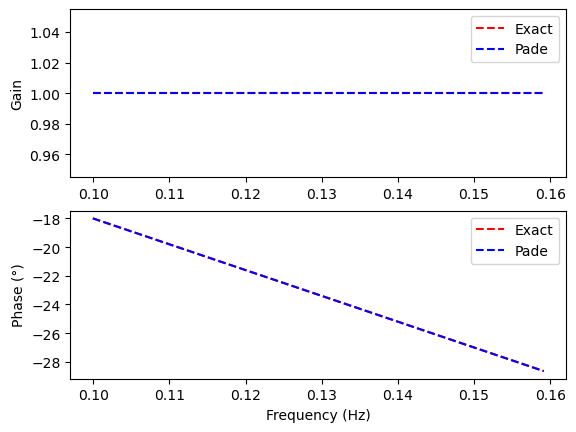

In [14]:
# Phase = -delay.w = 5° where delay=Ts/2
#gm, pm, wcg, wcp = control.margin(T)
# T_s = ??
T_s = 1 # To modify ?

print("Maximum sampling time: %.2e s"%T_s)

delay=T_s/2

num,den=control.pade(delay, 3)
pade=control.tf(num,den)

mag, phase, omega= control.bode(pade, plot=False, omega_limits=[1,2*3.14*.1], Hz=False)
                        

import matplotlib.pyplot as plt
import numpy as np

freq=omega/2/np.pi

plt.tight_layout()
fig, (ax1, ax2) = plt.subplots(2)    # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(freq, [1]*len(omega),'r--', label='Exact')
plt.plot(freq, mag,'b--', label='Pade')
plt.ylabel('Gain')
plt.legend()

plt.sca(ax2)                 # phase plot
plt.plot(freq,-delay*omega*180/np.pi,'r--', label='Exact')
plt.plot(freq, phase*180/np.pi,'b--', label='Pade')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.legend()

In [15]:
#PIDSysPade=T*pade
#mag, phase, omega= control.bode(PIDSysPade, plot=True, Hz=True, initial_phase=0, margins=True)

## Digital PID controller

### Recurrence equation  

> **Question:** - Discretize the PID controller in the form of a recurrence equation.


> **Exercice:** Define a PID function which returns    
> $o_k = o_{k-1} + K_i e_k T_s + K_p (e_k-e_{k-1}) +  \frac{K_d}{T_s}(e_k+ e_{k-2}-2e_{k-1})$  
> where $e_k$ is the error and $o_k$ the output of the controller. The `global` keyword defines variables which belongs to the global scope. 

In [16]:

def PID(order, measure):
    #global ??
    
    return max(0, min(100, o_k))

### Real tests

The following cells can be used to test your controller. 
The first step is to check that your card is responding correctly.

In [23]:
%matplotlib inline
from tclab import TCLab
from tclab import clock # from tclab import clock

# Start TCLab
# lab = TCLab()


TCLab version 1.0.0
Arduino Leonardo connected on port COM10 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.


In [17]:
tperiod = 20
tstep = 1

#lab.Q1(100)

#for t in clock(tperiod,tstep):
#    print("Time %4.1f sec. : Temp = %.2f"%(t,lab.T1))
           
#lab.Q1(0)

The following cell provides an initial implementation of PID control for heater T1.  

``` {code-cell} ipython3

print("Temperature 1: %0.2f °C"%(lab.T1))
print("Temperature 2: %0.2f °C"%(lab.T2))

import matplotlib.pyplot as plt
import numpy as np

time = []
Q1 = []
Kperror = []
T1 = []

Torder =35

tfinal = 400
tstep = T_s

%matplotlib qt

# Interactive mode
plt.ion()   # ion => interactive on / ioff => interactive off
plt.figure()
plt.plot(time, T1,'b-', label='T1')
plt.plot(time, Q1,'r-', label='Q1')
plt.plot(time, np.ones(len(time))*Torder,'g-', label='Order')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C) - Heating power /2 (%)')
plt.legend()
plt.show(block=False)

for t in clock(tfinal, tstep):
    Tmes=lab.T1
    Q = PID(Torder, Tmes)
    lab.Q1(Q)
    time = time + [t]
    T1 = T1 + [Tmes]
    Q1 = Q1 + [Q]

    Title='T1 = %.1f °C - Q1 = %.1f'%(Tmes,Q)
    plt.title(Title)
    plt.plot(time, T1,'b-')
    plt.plot(time, Q1,'y-')
    plt.plot(time, np.ones(len(time))*Torder,'g-')
    #plt.show(block=False)
    plt.pause(0.05)

   
plt.ioff()    
print("\nTurn Heater Q1 Off")
lab.Q1(0)
#lab.close()
```

In [ ]:
print("\nTurn Heater Q1 Off")
#lab.Q1(0)

Finally, you can display the temperature and power curves:

``` {code-cell} ipython3
%matplotlib inline

plt.ioff()  
plt.plot(time, T1,'b-', label='T1')
plt.plot(time, np.ones(len(time))*Torder,'g-', label='Order')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

plt.plot(time, Q1,'r-', label='Q1')
plt.xlabel('Time (s)')
plt.ylabel('Puissance de chauffe (%)')
plt.legend()
plt.show()
```